In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import uniform,norm,t,binom,expon,chi2,gamma,poisson,beta,dirichlet
from scipy.stats import multivariate_normal as multi_norm
from sklearn.linear_model import LinearRegression as Linear
from scipy.optimize import brentq,minimize
from scipy.special import perm,comb
import time
import pandas as pd

**11.1**

In [2]:
def Mmw(P,disp):
    X0=np.array([[0,1,0,0,0]])
    n=1000
    PB=np.zeros(n+1)
    X=X0.copy()
    PB[0]=X[0,3]
    for i in range(n):
        X=X.dot(P)
        PB[i+1]=X[0,3]

    plt.plot(np.arange(n+1),PB)
    plt.show()
    print('converge to',PB[-disp:])

    plt.plot(np.arange(11),PB[:11])
    plt.show()

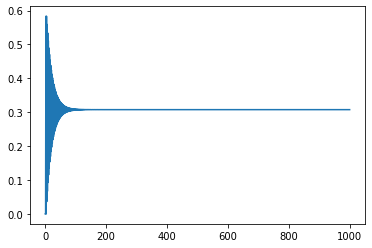

converge to [0.30769231]


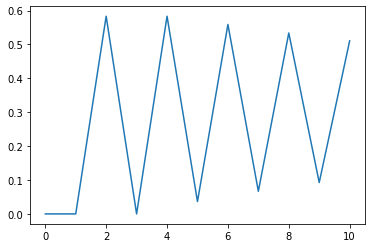

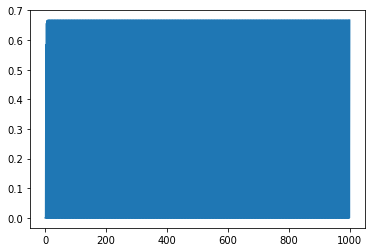

converge to [0.         0.66666667 0.         0.66666667]


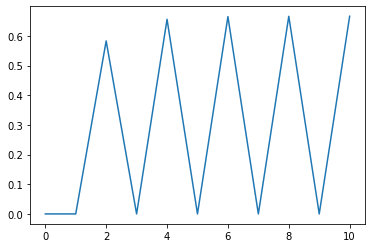

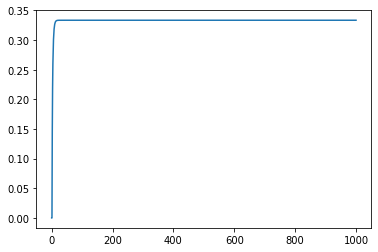

converge to [0.33333333]


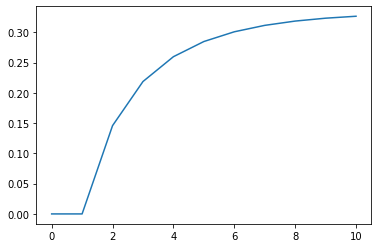

In [3]:
P1=np.array([[0,0.5,0,0.5,0],[0.5,0,0.5,0,0],[0,1/3,0,2/3,0],[0.25,0,0.5,0,0.25],[0,0,0,0.5,0.5]])
P2=np.array([[0,0.5,0,0.5,0],[0.5,0,0.5,0,0],[0,1/3,0,2/3,0],[0.25,0,0.5,0,0.25],[0,0,0,1,0]])
P3=(P2+np.diag(np.ones(5)))/2
Mmw(P1,1)
Mmw(P2,4)
Mmw(P3,1)

In [4]:
w,v=np.linalg.eig(P1.T)
print(w)
print(v)
p1=v[:,1]/v[:,1].sum()
print(p1)
print(p1[3])

[-0.94629011  1.         -0.20308961  0.09836858  0.55101113]
[[ 0.37310084 -0.32879797 -0.43147108 -0.48345497 -0.30906116]
 [-0.38780998 -0.32879797  0.49170714 -0.31463054 -0.42246929]
 [ 0.54129097 -0.49319696  0.3476248   0.63233317 -0.23476411]
 [-0.63662659 -0.65759595 -0.63290511  0.43903397  0.16375402]
 [ 0.11004476 -0.32879797  0.22504425 -0.27328164  0.80254055]]
[0.15384615 0.15384615 0.23076923 0.30769231 0.15384615]
0.3076923076923078


In [5]:
w,v=np.linalg.eig(P2.T)
print(w)
print(v)
p1=v[:,1]/v[:,1].sum()
print(p1)
print(p1[3])

[-1.00000000e+00  1.00000000e+00 -3.53553391e-01 -1.98025655e-17
  3.53553391e-01]
[[-3.42997170e-01  3.42997170e-01  4.08248290e-01  5.34522484e-01
  -4.08248290e-01]
 [ 3.42997170e-01  3.42997170e-01 -5.77350269e-01  3.00452053e-17
  -5.77350269e-01]
 [-5.14495755e-01  5.14495755e-01  1.47472983e-16 -8.01783726e-01
  -5.28339194e-16]
 [ 6.85994341e-01  6.85994341e-01  5.77350269e-01 -1.12669520e-16
   5.77350269e-01]
 [-1.71498585e-01  1.71498585e-01 -4.08248290e-01  2.67261242e-01
   4.08248290e-01]]
[0.16666667 0.16666667 0.25       0.33333333 0.08333333]
0.33333333333333337


In [6]:
w,v=np.linalg.eig(P3.T)
print(w)
print(v)
p1=v[:,1]/v[:,1].sum()
print(p1)
print(p1[3])

[-1.11022302e-16  1.00000000e+00  3.23223305e-01  5.00000000e-01
  6.76776695e-01]
[[ 3.42997170e-01 -3.42997170e-01 -4.08248290e-01 -5.34522484e-01
  -4.08248290e-01]
 [-3.42997170e-01 -3.42997170e-01  5.77350269e-01  2.89162225e-16
  -5.77350269e-01]
 [ 5.14495755e-01 -5.14495755e-01 -8.92536289e-16  8.01783726e-01
  -1.02165304e-15]
 [-6.85994341e-01 -6.85994341e-01 -5.77350269e-01  2.10299800e-16
   5.77350269e-01]
 [ 1.71498585e-01 -1.71498585e-01  4.08248290e-01 -2.67261242e-01
   4.08248290e-01]]
[0.16666667 0.16666667 0.25       0.33333333 0.08333333]
0.33333333333333354


**11.3**

In [7]:
print(np.array([2,2,3,4,2])/13)

[0.15384615 0.15384615 0.23076923 0.30769231 0.15384615]


**11.9**

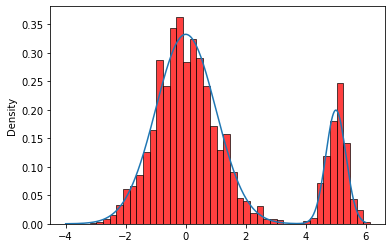

In [8]:
pi=lambda x: (5/6)*norm.pdf(x=x)+(1/6)*norm.pdf(x=x,loc=5,scale=1/3)
def RWM9(n,sigma):
    S=np.zeros(n+1)
    S[0]=0
    for i in range(n):
        y=norm.rvs(loc=S[i],scale=sigma)
        r=pi(y)/pi(S[i])
        if uniform.rvs()<=r:
            S[i+1]=y
        else:
            S[i+1]=S[i]
            
    return S

S=RWM9(5000,5)
x=np.linspace(-4,6,1000)
plt.plot(x,pi(x))
sb.histplot(S,color='r',stat='density')
plt.show()

In [39]:
lambdal=lambda S,l: np.sum((S[:S.size-l]-S.mean())*(S[l:]-S.mean()))/S.size
rhol=lambda S,l: lambdal(S,l)/(lambdal(S,0)+1e-10)

Sigma=np.linspace(4.5,5.5,11)
for sigma in Sigma:
    np.random.seed(123)
    S=RWM9(5000,sigma)
    print(sigma,rhol(S,1))

4.5 0.7902166479738597
4.6 0.7745941383485517
4.7 0.7738010401170043
4.8 0.7762231279226478
4.9 0.7788336298720318
5.0 0.7831666781368699
5.1 0.7767799624060796
5.2 0.7867348173343427
5.3 0.7757172962516344
5.4 0.7874570136416853
5.5 0.796119874134796


In [10]:
res=minimize(pi,3)
xs=res['x'][0]
print(xs)

3.708094804708508


In [11]:
Sigma=np.linspace(4,6,11)
for sigma in Sigma:
    np.random.seed(3033079628)
    S=RWM9(5000,sigma)
    fS=1.0*(S>xs)
    print(sigma,rhol(fS,1))

4.0 0.7840499291315252
4.2 0.7444021549825828
4.4 0.7774309603339299
4.6 0.7441530130086834
4.8 0.7391572142782933
5.0 0.7465805480365983
5.2 0.7643245240276474
5.4 0.7785106600453667
5.6 0.7671789124542371
5.8 0.7615417619369562
6.0 0.7748232172594861


**11.10**

In [28]:
Theta=np.array([[9.11,7.89,-0.24,0.5,1.41,-7.97,-6.5,-4.21],[4.82,-2.69,1.22,0.08,-0.97,2.97,-5.33,-0.11]])
piu=lambda x: np.max([multi_norm.pdf(x=x,mean=theta) for theta in Theta.T],axis=0)
def RWM10(n,sigma):
    S=np.zeros([n+1,2])
    S[0]=[0,0]
    U=multi_norm.rvs(size=n,mean=[0,0])
    R=uniform.rvs(size=n)
    for i in range(n):
        y=S[i]+sigma*U[i]
        r=piu(y)/piu(S[i])
        if R[i]<=r:
            S[i+1]=y
        else:
            S[i+1]=S[i]
            
    return S

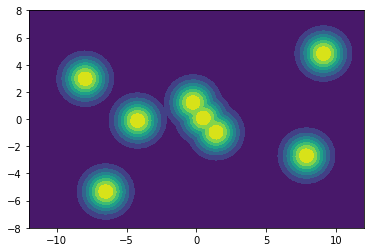

In [29]:
X=np.linspace(-12,12,110)
Y=np.linspace(-8,8,80)
X,Y=np.meshgrid(X,Y)
Z=np.array([X,Y]).T
Z=piu(Z).T
plt.contourf(X,Y,Z)
plt.show()

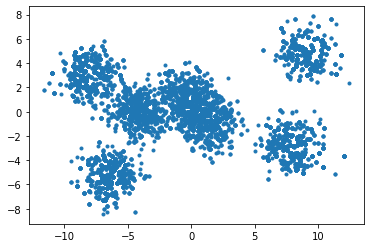

8


In [30]:
def discover(S):
    num=0
    for theta in Theta.T:
        if any(((theta-S)**2).sum(axis=1)<=4):
            num+=1
            
    return num

S=RWM10(10000,5)
plt.plot(S[:,0],S[:,1],'.')
plt.show()
print(discover(S))

In [23]:
Sigma=2**np.linspace(-3,4,8)
discovery=np.zeros(8)
for i,sigma in enumerate(Sigma):
    np.random.seed(3033079628)
    for t in range(10):
        S=RWM10(1000,sigma)
        discovery[i]+=discover(S)
    
discovery=np.array([Sigma,discovery/10])
print(discovery)

[[ 0.125  0.25   0.5    1.     2.     4.     8.    16.   ]
 [ 3.3    3.9    4.6    5.7    7.     8.     8.     7.7  ]]


In [27]:
Sigma=2**np.linspace(-1,6,8)
for sigma in Sigma:
    np.random.seed(3033079628)
    S=RWM10(5000,sigma)[:,0]
    print(sigma,rhol(S,1),len(set(S))/S.size)

0.5 0.9938939196358805 0.7720455908818237
1.0 0.9917953760585714 0.5984803039392121
2.0 0.9700176988016402 0.39692061587682465
4.0 0.9707493356827273 0.21315736852629474
8.0 0.9536683548521392 0.10977804439112178
16.0 0.9653958249036313 0.03959208158368326
32.0 0.9873358838069409 0.01199760047990402
64.0 0.9971928210126715 0.0027994401119776045


In [35]:
def close(j,S):
    dist=np.array([np.sum((S-theta)**2,axis=1) for theta in Theta.T])
    flag=(dist.min(axis=0)==dist[j,:])
    return np.mean(flag)
    
Sigma=2**np.linspace(-1,6,8)
for sigma in Sigma:
    np.random.seed(53465496)
    S=RWM10(5000,sigma)
    print(sigma,close(0,S))

0.5 0.0
1.0 0.0
2.0 0.10417916416716656
4.0 0.08598280343931214
8.0 0.1807638472305539
16.0 0.2923415316936613
32.0 0.09658068386322735
64.0 0.0


In [40]:
def close(j,S):
    dist=np.array([np.sum((S-theta)**2,axis=1) for theta in Theta.T])
    flag=1.0*(dist.min(axis=0)==dist[j,:])
    return flag
    
Sigma=2**np.linspace(-1,6,8)
for sigma in Sigma:
    np.random.seed(53465496)
    S=RWM10(5000,sigma)
    print(sigma,rhol(close(0,S),100))

0.5 0.0
1.0 0.0
2.0 0.3184703458109389
4.0 0.04398698536379404
8.0 -0.04817523821368207
16.0 0.18369508331957204
32.0 0.2553417122083538
64.0 0.0


**11.11**

In [89]:
def RWM11(n,sigma):
    S=np.zeros([n+1,2])
    S[0]=[0,0]
    U=multi_norm.rvs(size=n,mean=[0,0])
    R=uniform.rvs(size=n)
    flag1=False
    N11=0
    N12=0
    flag2=False
    N21=0
    N22=0
    flag3=True
    for i in range(n):
        y=S[i]+sigma*U[i]
        r=piu(y)/piu(S[i])
        if R[i]<=r:
            S[i+1]=y
            dist=np.sum((y-Theta.T)**2,axis=1)
            close=np.arange(8)[dist==dist.min()]
            if close==0:
                flag1=True
            elif close==6:
                flag2=True
                
            flag3=True
        else:
            S[i+1]=S[i]
            flag3=False
            
        if flag1 and (not flag2):
            if flag3:
                N11+=1
            else:
                N12+=1
                
        elif flag2 and (not flag1):
            if flag3:
                N21+=1
            else:
                N22+=1
                
        elif flag1 and flag2:
            if N11+N12!=0:
                if flag3:
                    N11+=1
                else:
                    N12+=1
                    
                break
            else:
                if flag3:
                    N21+=1
                else:
                    N22+=1
                
                break
            
    return N11,N12,N21,N22

In [92]:
T=200
Steps=np.zeros([T,4])
for t in range(T):
    Steps[t]=RWM11(100000,5)
    
print(np.mean(Steps[:,0]+Steps[:,1]>0),np.mean(Steps[:,2]+Steps[:,3]>0))
print(np.mean(Steps,axis=0))

0.4 0.6
[ 7.405 35.37  16.895 68.865]


**11.12**